In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from matplotlib.ticker import ScalarFormatter
path=r"D:\catallah\OneDrive - catallah\my learning\python\fake data\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\sales.csv"

In [3]:
#Read the file sales.csv
sales=pd.read_csv(path)

In [4]:
# add new date column with type datetime as our Order Date is just an object, Datetime type makes it easy to extract month and year
sales["date"]=pd.to_datetime(sales["Order Date"],format="mixed")


In [5]:
sales["month"]=sales["date"].dt.month

In [6]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4


## New Sales Column


In [7]:
#new column sales added 
sales["sales"]=sales["Quantity Ordered"]*sales["Price Each"]

In [8]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99


# Month with highest sales

In [9]:
highest_sales_month=sales.groupby("month",as_index=False)["sales"].sum()

In [10]:
highest_sales_month=highest_sales_month.sort_values(by="sales",ascending=False)

In [11]:
highest_sales_month=highest_sales_month.set_index("month")

<Axes: title={'center': 'Sales VS Month'}, xlabel='month', ylabel='Sales'>

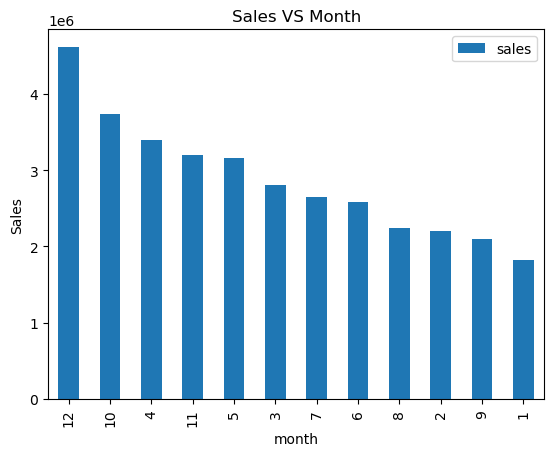

In [12]:
highest_sales_month.plot(kind="bar",ylabel="Sales",title="Sales VS Month")

## what City had the highest number of sales?

In [13]:
sales["City"]=sales["Purchase Address"].apply(lambda x: x.split(",")[1]+" "+(x.split(",")[2]).split(" ")[1])

In [14]:
City_highest_sales=sales.groupby("City")["sales"].sum().reset_index()

In [15]:
City_highest_sales.sort_values(by="sales",ascending=False)

,City,sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


AttributeError: This method only works with the ScalarFormatter

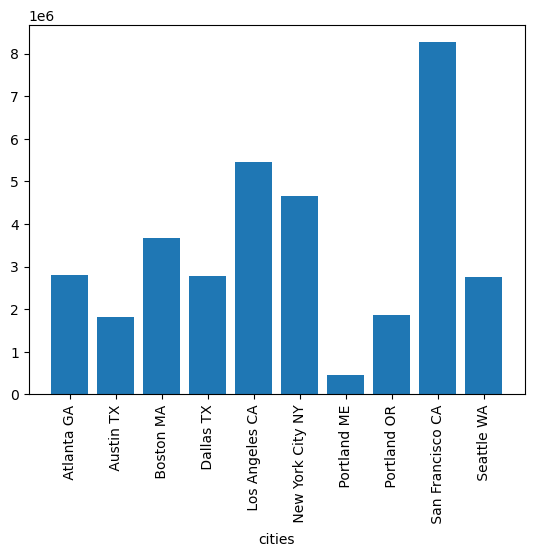

In [71]:
plt.bar(City_highest_sales["City"],City_highest_sales["sales"])
plt.xlabel("cities")
plt.xticks(rotation="vertical")
plt.ticklabel_format(useOffset=False)
plt.show()

## what time should we advertise products to get maximum profit

In [17]:
# extract hour from the order date/date
sales["hour"]=sales["date"].dt.hour
sales["minute"]=sales["date"].dt.minute
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,month,sales,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99,Los Angeles CA,9,27


In [18]:
#count products by hours
products_count=sales.groupby("hour").count().reset_index()

In [19]:
products_count["Product"]

0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Product, dtype: int64

Text(0.5, 0, 'hours')

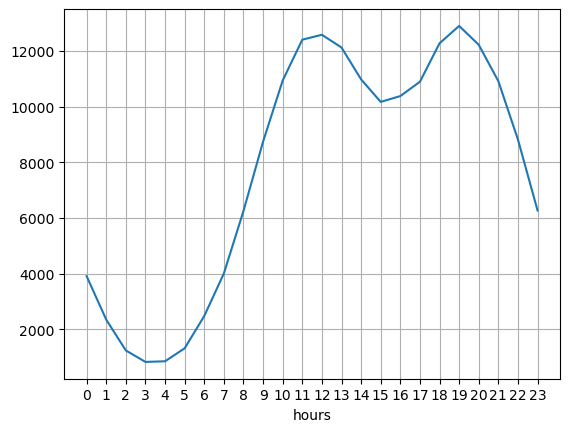

In [20]:
plt.plot(products_count["hour"],products_count["Product"])
plt.xticks(products_count["hour"])
plt.grid()
plt.xlabel("hours")

# What products are most often sold together?

In [21]:
#first we find the same order ID
df_duplicates=sales[sales["Order ID"].duplicated(keep=False)]

In [22]:
#for same order ID we join the products
df_duplicates["grouped"]=df_duplicates.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

C:\Users\chahi\AppData\Local\Temp\ipykernel_15100\632141959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates["grouped"]=df_duplicates.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [23]:
df_duplicates=df_duplicates[["Order ID","grouped"]].drop_duplicates()

In [24]:
#count the occurence of product pairs
df_duplicates["grouped"].value_counts()

grouped
iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: count, Length: 366, dtype: int64

## What Product sold the most?

In [25]:
most_sold_product=sales.groupby("Product")["Quantity Ordered"].sum().reset_index()

Text(0.5, 1.0, 'Most Product Sold')

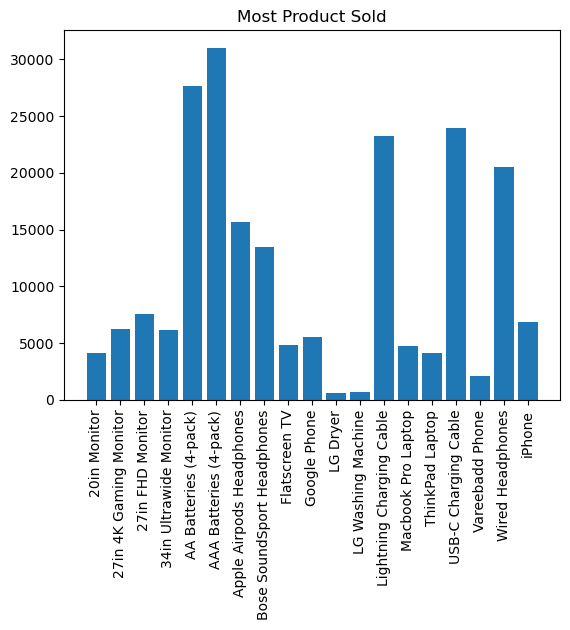

In [86]:
most_sold_product=most_sold_product.sort_values(by="Product")

plt.bar(most_sold_product["Product"],most_sold_product["Quantity Ordered"])
plt.xticks(rotation=90)
plt.title("Most Product Sold")

In [27]:
df_duplicates.head()

,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [75]:
prices_product=sales[["Product","Price Each"]]

In [79]:
prices_product=prices_product.drop_duplicates()

In [85]:
prices_product=prices_product.sort_values(by="Product")
prices_product

,Product,Price Each
34,20in Monitor,109.99
12,27in 4K Gaming Monitor,389.99
33,27in FHD Monitor,149.99
108,34in Ultrawide Monitor,379.99
13,AA Batteries (4-pack),3.84
19,AAA Batteries (4-pack),2.99
15,Apple Airpods Headphones,150.00
1,Bose SoundSport Headphones,99.99
28,Flatscreen TV,300.00
2,Google Phone,600.00


## Adding products vs quantity sold and products vs price on same graph

C:\Users\chahi\AppData\Local\Temp\ipykernel_15100\3029924875.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prices_product["Product"],rotation="vertical")


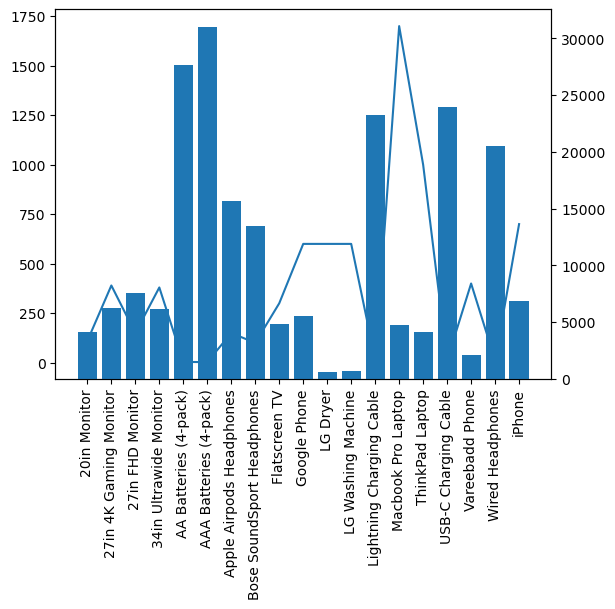

In [131]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()

first=ax1.plot(prices_product["Product"],prices_product["Price Each"])
second=ax2.bar(most_sold_product["Product"],most_sold_product["Quantity Ordered"])
ax1.set_xticklabels(prices_product["Product"],rotation="vertical")
plt.show()